# Dimensionality reduction

Despite much progress in recent centuries, infectious disease continues to be one of humanity's most persistent problems. To understand and ultimately contain infectious diseases, it is helpful to understand how the human immune system responds to them, especially at the cellular and molecular level.

In a recent study a cohort of 16 healthy human volunteers received intranasal inoculation of influenza H3N2/Wisconsin and 9 of these subjects developed mild to severe symptoms based on standardized symptom scoring [1]. In the week following inoculation, the patient's blood was drawn every 8 hours for microarray analysis. The resulting dataset contains 268 samples: 16 patients and about 17 samples from each patient. Patients were classified as "asymptomatic" if the Jackson score (which is a symptom score that indicates actual infection) was less than 6 over the first five days of observation and viral shedding was not documented after the first 24 hours subsequent to inoculation. The other patients were labeled "symptomatic".

I this practical session we will analyse this data set unsupervised. We will chart the course of flu infection and try to identify genes that are involved.

> [1] Huang, Yongsheng, et al. Temporal dynamics of host molecular responses differentiate symptomatic and asymptomatic influenza A infection. PLoS genetics 7.8 (2011).

Let's start by loading the data.

In [0]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554/master/practicum/5._Dimensionality_reduction/flu.csv")

In [4]:
data.head(5)

,10002_at,10003_at,10004_at,10005_at,10006_at,10007_at,10009_at,1000_at,10010_at,10013_at,10014_at,10015_at,10016_at,10017_at,10018_at,10019_at,1001_at,10020_at,10021_at,10022_at,10023_at,10024_at,10025_at,10026_at,1002_at,10036_at,10038_at,10039_at,1003_at,10040_at,10042_at,10043_at,10045_at,10046_at,10047_at,10048_at,10049_at,1004_at,10050_at,10051_at,...,9955_at,9956_at,9957_at,9958_at,995_at,9960_at,9961_at,9962_at,9966_at,9967_at,9968_at,996_at,9970_at,9971_at,9972_at,9973_at,9975_at,9976_at,9978_at,997_at,9980_at,9982_at,9984_at,9985_at,9986_at,9987_at,9988_at,9989_at,998_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at,999_at,9_at,subject,type,time
0,0.032525,0.015096,-0.274163,-0.333238,-0.133675,0.029634,0.041531,0.112252,-0.025757,0.117923,0.038419,-0.142143,-0.116986,0.122293,-0.128497,-0.280822,0.075082,0.346623,0.014129,-0.002880,0.045779,0.010661,0.403579,-0.208967,-0.189865,0.039478,-0.017924,-0.041987,0.026132,-0.032872,-0.120758,-0.035242,-0.021681,0.310535,-0.108795,-0.030403,-0.174617,-0.069222,-0.078404,-0.202217,...,-0.039146,-0.050218,0.046251,-0.600171,-0.108020,-0.169235,-0.086491,-0.066543,-0.137125,-0.628699,0.042803,0.023904,0.189577,-0.219614,0.114545,0.261683,-0.893769,-0.270312,0.332876,0.904662,0.309453,-0.115536,0.107293,-0.078429,-0.052896,0.181055,-0.053916,-0.175346,-0.090403,0.154224,-0.098528,0.000522,-0.119943,-0.150252,-0.844311,0.013486,-0.472906,1,symptomatic,0
1,-0.063798,-0.054563,-0.044692,-0.251884,-0.080583,-0.360632,-0.020238,-0.094011,0.082352,0.196478,-0.029710,-0.213282,-0.199538,-0.000933,0.129928,-0.481661,-0.133644,0.308328,-0.048114,0.046858,0.146557,-0.403086,0.531657,-0.141109,-0.207053,-0.086219,0.138437,-0.068934,0.196372,0.030675,-0.094817,-0.079818,-0.156834,0.360925,0.191889,0.174202,-0.103719,-0.036049,-0.140284,0.139690,...,-0.046839,-0.326177,0.290745,-0.291339,-0.089338,-0.206806,0.026018,-0.317953,0.020617,-0.282401,0.128022,0.140927,-0.093781,-0.264891,0.147179,0.316925,-1.143827,0.150734,0.602605,1.288199,0.164399,-0.110928,0.168382,-0.111451,0.151094,0.214930,0.042183,-0.044566,-0.002653,0.234627,0.033788,-0.111438,-0.163886,0.286530,-0.773889,-0.000414,-0.254953,1,symptomatic,1
2,0.197434,0.106990,0.004244,-0.214974,-0.339999,-0.270067,0.055495,0.068424,-0.113263,0.220205,-0.031734,-0.408570,-0.153908,0.494323,0.426128,-0.740192,0.038496,-0.094383,0.009295,0.319151,0.003655,0.330515,0.522684,0.007673,-0.297769,-0.133257,-0.065865,-0.127185,-0.035920,0.167031,-0.255041,-0.021566,-0.132681,0.086252,0.238756,-0.070437,-0.165218,0.080383,0.087621,-0.241557,...,0.269118,0.308835,-0.183812,-0.711316,0.220033,-0.296430,-0.113155,-0.479546,0.134478,-0.536046,0.014172,0.051601,-0.071578,0.048442,-0.169222,0.268082,-1.185599,-0.126099,0.500759,1.133857,-0.198683,-0.118738,0.010940,-0.487648,0.421392,-0.117645,-0.419944,0.036090,0.023931,0.443557,0.002347,0.060106,-0.291948,-0.177728,-1.022652,-0.000998,-0.733726,1,symptomatic,2
3,-0.038433,0.040574,0.015154,-0.245311,-0.053418,-0.070803,0.271969,-0.142061,0.229480,-0.002120,-0.076142,-0.241092,-0.024590,-0.020637,0.494051,-0.479712,-0.160798,0.343081,-0.209239,0.041406,-0.046507,-0.260105,0.480487,0.306200,0.289869,-0.126458,0.080491,-0.157446,-0.153034,-0.100528,-0.040803,-0.157614,0.017535,0.234328,0.043602,0.216314,-0.061853,-0.042389,-0.201810,0.216841,...,-0.185058,-0.183490,0.039758,-0.360694,-0.231748,-0.169172,-0.057880,-0.260352,-0.012623,-0.340255,0.018726,0.331413,-0.053059,-0.095850,0.063738,0.418723,-0.608945,0.280404,0.577157,1.240089,0.244168,-0.276294,0.089062,-0.535223,-0.075699,0.240028,-0.116734,0.084119,-0.052088,0.246433,0.196170,-0.194425,-0.215175,0.089734,-0.814457,0.028076,-0.471819,1,symptomatic,3
4,0.044036,-0.111893,0.314011,0.030471,-0.031469,-0.014274,0.003590,-0.079671,0.371623,0.051905,0.003762,-0.213712,0.059706,-0.035160,-0.032280,-0.528684,0.066557,-0.103789,-0.327135,0.064744,-0.081990,-0.428416,0.796471,0.552036,-0.131493,-0.062789,-0.046261,0.008918,0.110789,0.017626,0.109385,-0

The microarray used in this study measures 11959 gene expression values. There are three more columns in the data set:

- 'subject': identifies the volunteer
- 'type': the symptom annotation
- 'time': the timepoint of the microarray measurement

Plot a boxplot of the first 100 genes.

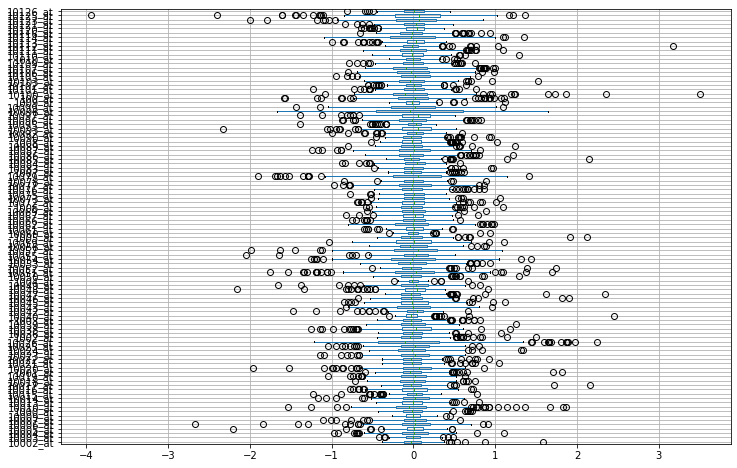

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
data.iloc[:,:100].boxplot(vert=False)
plt.show()

We will be using PCA to analyze this data set. Should we normalize this data set?

Let's plot a heatmap of some of the genes for subject 2. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


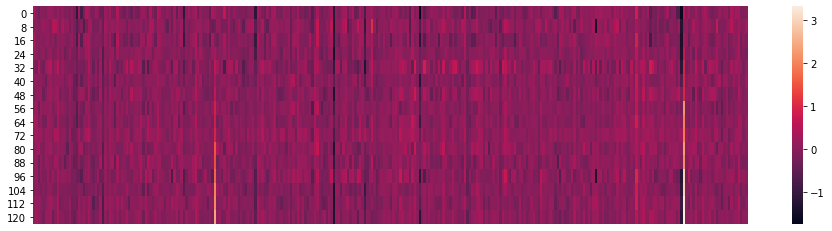

In [6]:
import seaborn as sns

plt.figure(figsize=(16,4))
sns.heatmap(data[data.subject==2].iloc[:,200:500],square=False,xticklabels=False,yticklabels=range(0,128,8))
plt.show()

In this heatmap the genes are on the x-axis, the time (in hours) is on the y-axis. The color levels indicate the expression measurements of the genes. 

*Do you see something interesting? Yes? What is it?*

---(Answer here)

*Make the same plot for subject 1.*

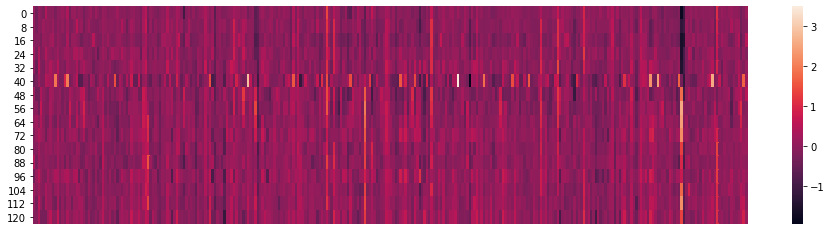

In [7]:
plt.figure(figsize=(16,4))
sns.heatmap(data[data.subject==1].iloc[:,200:500],square=False,xticklabels=False,yticklabels=range(0,128,8))
plt.show()

*Do you see something strange?*

--(Answer here)

*Pop the column 'subject' in a variable called `subjects`. Pop the column 'type' in a variable called`types`. Pop the column 'time' in a variable called `times`.*

In [0]:
subjects = data.pop('subject')
types = data.pop('type')
times = data.pop('time')

*If we apply PCA on the data set `data` to reduce the 11959 genes (the features), how many principle components do we require to explain at least 80% of the data? Check the scikit-learn webpage for help on how to obtain the explained variance ratio in the PCA module.*

In [9]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit_transform(data)

print(np.sum(pca.explained_variance_ratio_[:16]))
print(np.sum(pca.explained_variance_ratio_[:17]))

0.7931857427838518
0.802504505083439


Reduce the number genes to just two and store these principle components in a pandas dataframe called `data_projected`. 

In [0]:
pca = PCA(n_components=2)
data_projected = pd.DataFrame(pca.fit_transform(data),columns=['PC1','PC2'])

How much of the variance do these 2 explain?

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.4137246487992572


Add the variables `subjects`, `types` and `times` as columns to dataframe `data_projected`.

In [0]:
data_projected['subject'] = subjects
data_projected['type'] = types
data_projected['time'] = times

Use the seaborn `lmplot()` function to plot the 2 principle components.

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


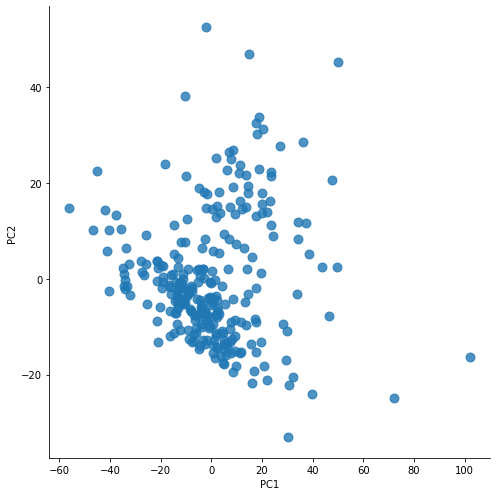

In [13]:
sns.lmplot(x="PC1",y="PC2",data=data_projected, fit_reg=False, size=7, scatter_kws={"s": 80})
plt.show()

Make the same plot but split it by 'type'.

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


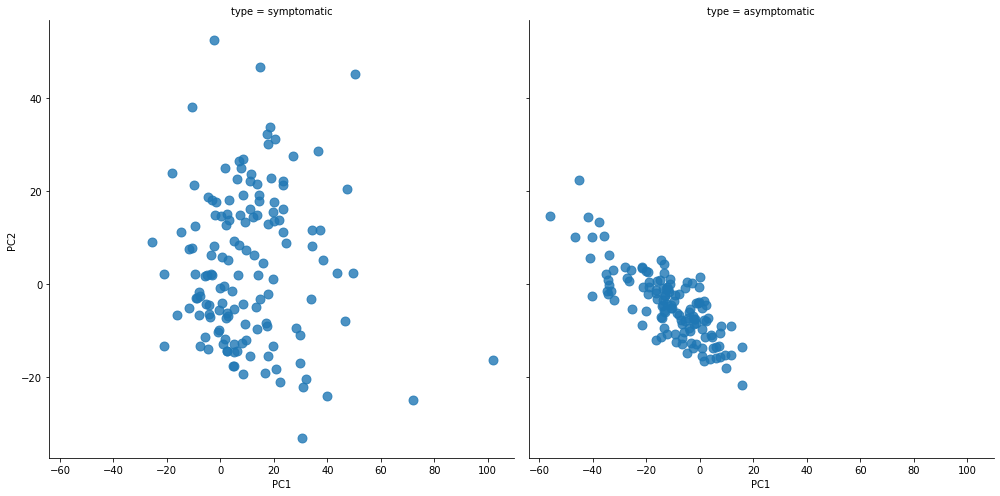

In [14]:
data_projected['type'] = types
sns.lmplot(x="PC1",y="PC2",data=data_projected, col='type', fit_reg=False, size=7, scatter_kws={"s": 80})
plt.show()

What do you see?

Color the microarray measurements by 'subject'.

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


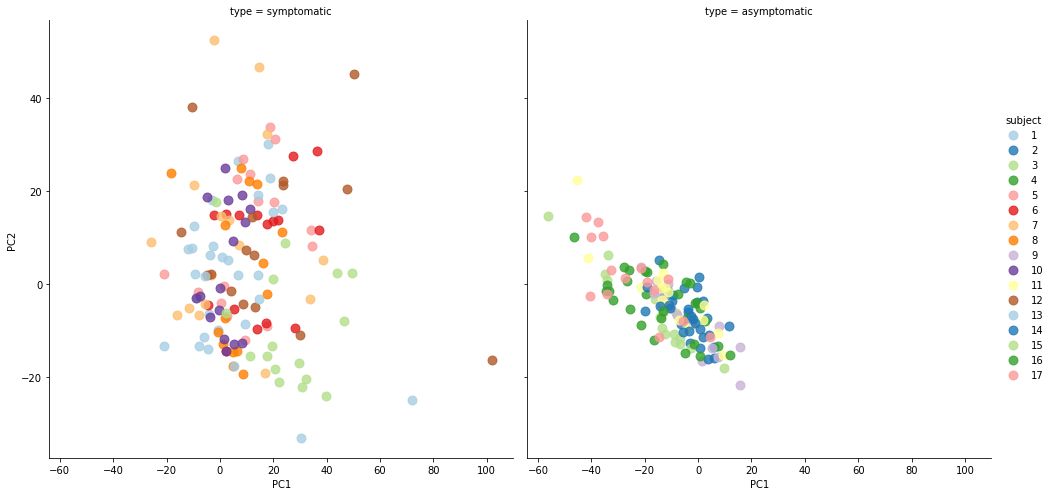

In [15]:
data_projected['subject'] = subjects
sns.lmplot(x="PC1",y="PC2",data=data_projected, col='type', hue='subject', fit_reg=False, size=7, scatter_kws={"s": 80}, palette="Paired")
plt.show()

Do the volunteers cluster together? 

The first 2 principle components can separate many of the symptomatic subjects from the asymptomatic ones. However, not all of them. 

Let's take a look at what we have found. We could say that we reduced the 11959 genes to just two genes, maybe we can call them eigengenes. These 2 eigengenes explain most of the variation observed over all subjects and time points. However, they will be orthogonal to each other. This means the behavior of the 2 eigengenes should be very different.

Use the seaborn function `factorplot()` to plot the data set `data_projected` as a pointplot with on the x-axis column 'time' and on the y-axis the values for the first eigengene. Color the eigengene by column 'subject' and spit the plot by column 'type'.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


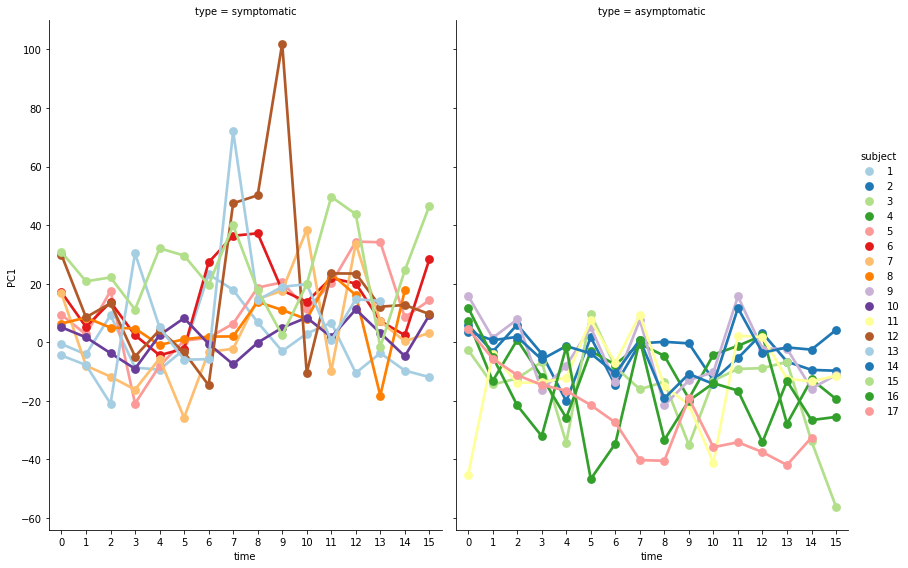

In [22]:
sns.factorplot(kind="point",x='time',y='PC1',data=data_projected,col='type',hue="subject",size=8,aspect=.75,palette="Paired")
plt.show()

What do you see? 

Do the same for the second eigengene.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


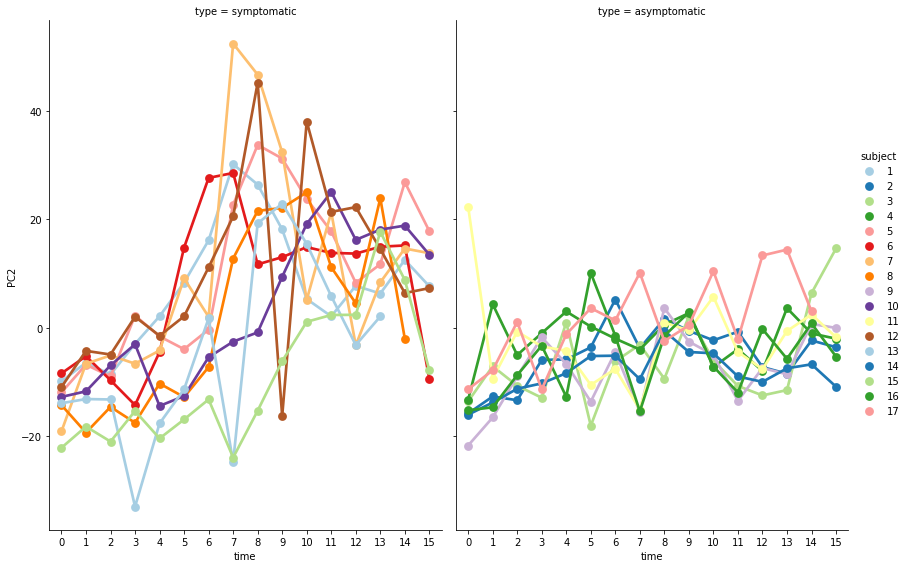

In [23]:
sns.factorplot(kind="point",x='time',y='PC2',data=data_projected,col='type',hue="subject",size=8,aspect=.75,palette="Paired")
plt.show()

What do you see?

Now create the same plot for the first eigengene but remove the coloring by column 'subject'.This will create a sumary plot where each point is the mean value for the first eigengene over all volunteers. The error bars estimate the variation between the volunteers.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


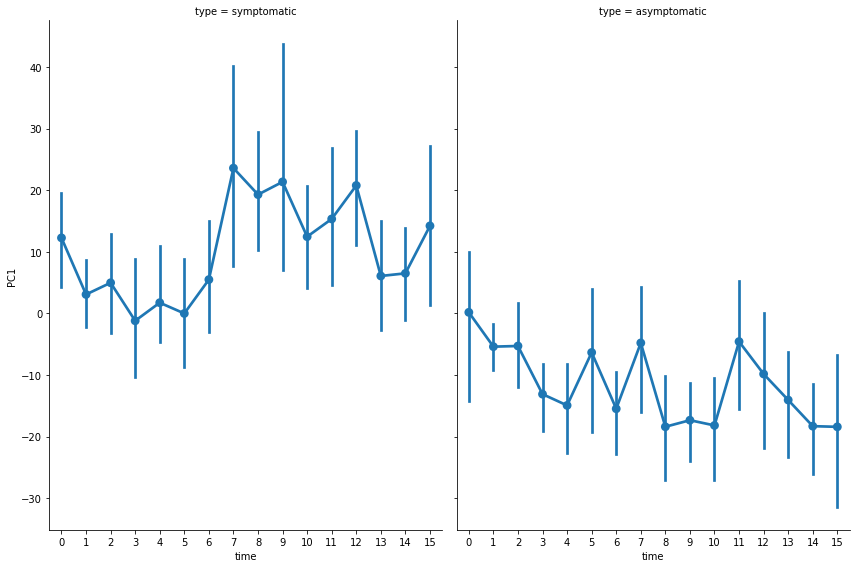

In [18]:
sns.factorplot(kind="point",x='time',y='PC1',data=data_projected,col='type',size=8,aspect=.75)
plt.show()

Do the same for the second eigengene.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


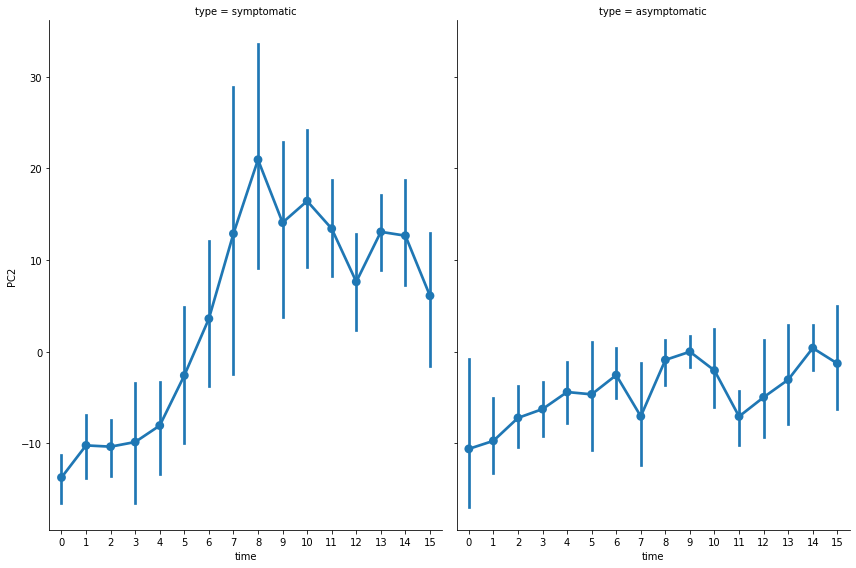

In [19]:
sns.factorplot(kind="point",x='time',y='PC2',data=data_projected,col='type',size=8,aspect=.75)
plt.show()

By now you should have noticed how both eigengenes show very different behavior between the symptomic and the asymptomic subjects. We can even see when after inoculation of influenza H3N2/Wisconsin gene expression starts to change for the symptopic subjects.

The eigengenes of course don't have much biological meaning. However, they are a weighted linear combination of the original genes. So, by looking at the magnitude of these weights we can learn about the contribution of each gene to the eigengene. Since these eigengenes show different behavior between symptomic and asymptomic subjects the genes with very large or very small weights should do so too.

Create a pandas dataframe called `pca_weights` with two columns:

- 'genes' that contains the gene names
- 'weights' that contains the weights in the first eigengene

In [0]:
pca_weights = pd.DataFrame()
pca_weights['genes'] = data.columns.values
pca_weights['weights'] = np.abs(pca.components_[0])

To sort this dataframe by column 'weights' you can use the following code:

In [24]:
pca_weights.sort_values(['weights'],ascending=False).head()

,genes,weights
11218,91543_at,0.047832
9070,710_at,0.046689
3342,27074_at,0.042310
767,10964_at,0.039760
5012,439992_at,0.039164


So? Did we find something interesting? How about the second eigengene? Find the 5 most interesting genes for the second eigengene.

In [25]:
pca_weights = pd.DataFrame()
pca_weights['genes'] = data.columns.values
pca_weights['weights'] = np.abs(pca.components_[1])

pca_weights.sort_values(['weights'],ascending=False).head()

,genes,weights
11218,91543_at,0.110752
4262,3434_at,0.109929
767,10964_at,0.098781
472,10561_at,0.093607
3342,27074_at,0.091978
